In [1]:
import numpy as np 
import matplotlib.pyplot as plt

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


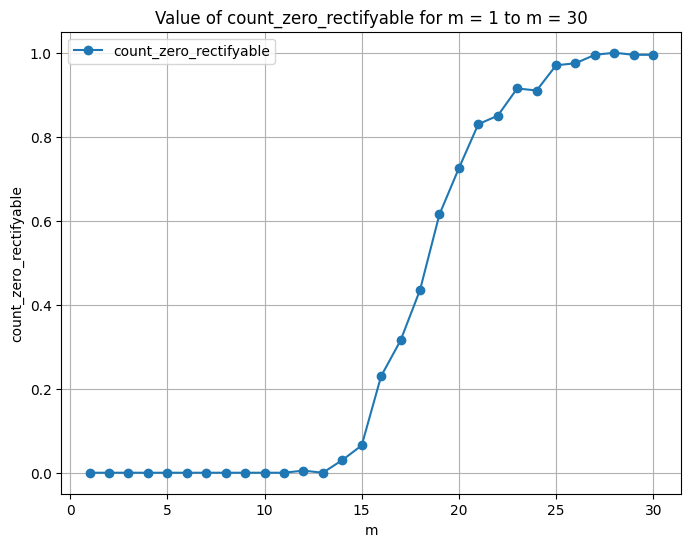

In [18]:
def check_is_frame(C: np.ndarray) -> bool:
    S = C.T @ C 
    eigen_values = np.linalg.eigvalsh(S)
    return eigen_values[0] > 0

def random_vectors_in_ball(radius, n_points, dimensions):
    directions = np.random.normal(size=(n_points, dimensions))
    directions /= np.linalg.norm(directions, axis=1, keepdims=True)
    radii = radius * np.cbrt(np.random.uniform(0, 1, size=n_points))
    vectors = directions * radii[:, np.newaxis]
    return vectors

def check_alpha_rectifyable_over_ball(C: np.ndarray, alpha: np.ndarray, r: float, iter_range: int) -> bool:
    _, n = C.shape
    xs = random_vectors_in_ball(r, iter_range, n)
    return np.all([check_is_frame(C[C @ x - alpha > 0]) for x in xs])

def count_zero_rectifyable(m:int, n:int, iter_range:int) -> int:
    print(m)
    cnt = 0
    for _ in range(iter_range):
        C = np.random.normal(0, 1, (m, n))
        cnt += check_alpha_rectifyable_over_ball(C, np.zeros(m), 1e-15, 200)

    return cnt 

n = 5 
m_values = range(1, 31)
counts = [count_zero_rectifyable(m, n, 200)/200 for m in m_values]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(m_values, counts, marker='o', label="count_zero_rectifyable")
plt.title("Value of count_zero_rectifyable for m = 1 to m = 30")
plt.xlabel("m")
plt.ylabel("count_zero_rectifyable")
plt.grid(True)
plt.legend()
plt.show()
